<a href="https://colab.research.google.com/github/PalakB09/Footsteps-Detection-using-MFCCs/blob/main/Document_from_Priya_Gupta%F0%9F%92%AB_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**  : In today's rapidly evolving landscape of footsteps detection techniques, where various approaches employ sensors, seismic detectors, and more, a novel method has emerged. This research endeavors to introduce an innovative approach by integrating Mel Frequency Cepstrum Coefficients (MFCC) with advanced algorithms such as Convolutional Neural Networks (CNN), Long Short-Term Memory (LSTM), and Support Vector Machines (SVM). The core objective is to harness the potential of audio datasets by extracting distinctive cepstral coefficients. Subsequently, these coefficients undergo rigorous processing through SVM, CNN, and LSTM models to discriminate between 'footstep' and 'non-footstep' auditory patterns. This research addresses the contemporary challenge of footsteps detection with a comprehensive and multifaceted approach, offering the promise of enhanced accuracy and adaptability in real-world scenarios.


---



---



#**CLASSIFICATION OF FOOTSTEPS AND NON FOOTSTEPS USING MFCC COEFFICIENTS WITH LSTM,CNN AND SVM**


---



---



##**Importing all the libraries**

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## **Data Extraction**

### **Overview:**
The audio data was systematically stored in the "audio_data" folder, categorized into subfolders labeled as "footsteps" and "non-footsteps." These folders contained distinct sets of audio files, all of which were in the .mp3 format.

### **Unprocessed Nature:**
The collected audio files were intentionally kept raw and unprocessed to maintain their authenticity and original characteristics.

### **Diverse Footstep Scenarios:**
A comprehensive range of footstep scenarios were gathered, encompassing different surfaces such as dried leaves, stony paths, hollow wooden floors, fallen tree trunks, dirt roads, and sneakers.

### **Variety in Non-Footstep Sounds:**
Similarly, non-footstep audio packs were curated to cover a broad spectrum of sounds, including wooden gates, telephone ringtones, crashes, radio alarm clocks, pouring water, and classic typewriter noises.

### **Source Attribution:**
The dataset was compiled from Zapsplat, a reputable source for a wide array of sound effects, ensuring the inclusion of high-quality and diverse audio samples.

Reference: https://www.zapsplat.com/sound-effect-packs/

In [ ]:
audio_folder = '/content/audio_data'
labels = [label for label in os.listdir(audio_folder) if label.lower() != ".ipynb_checkpoints"]

num_mfcc = 16
n_fft = 600
hop_length = 350
sr = None



##We have 2 labels **footsteps** and **non-footsteps**

In [ ]:
labels

['footsteps', 'non-footsteps']

##We've developed a dedicated function for extracting **Mel-frequency cepstral coefficients (MFCCs)** from our audio data. This function is tailored to our dataset's specific needs, and we've predefined certain parameter values to ensure optimal feature extraction. Here are the details of the parameters we've set:

###--->**num_mfcc(Number of MFCC Coefficients)**: We've set this value to **16**, indicating that we want to extract 15 MFCC coefficients for each audio sample. These coefficients capture crucial spectral information that's useful for various audio analysis tasks.

###--->**n_fft (FFT Window Length)**: With a value of **600**, the FFT window length is determined. This parameter governs the granularity of frequency analysis. A larger window can capture finer frequency details in the audio signal.

###--->**hop_length**: We've opted for a relatively small value of **350** for the hop length. Despite its smallness, this choice increases time resolution and results in a higher number of features.

###--->**sr (Sampling Rate)**: Our choice of setting sr to **None** allows us to retain the native sampling rate of the audio files. This rate denotes the number of samples per second in the audio signal. By keeping it native, we ensure that we accurately capture the audio's frequency characteristics.

In [ ]:

def extract_mfcc(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
     #print(f"Shape of loaded audio data: {audio.shape}")
     #Above line can be uncommented to keep a track of the files whose  coefficients are getting extracted
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs



In [ ]:
data = []
target_labels = []
audio_files = []


for label in labels:
    label_folder = os.path.join(audio_folder, label)
    audio_files_per_label = [f for f in os.listdir(label_folder) if f.endswith('.mp3')]
    audio_files.extend(audio_files_per_label)

    print(f"Label: {label}, Number of audio files: {len(audio_files_per_label)}")

    for audio_file in audio_files_per_label:
        audio_path = os.path.join(label_folder, audio_file)
        mfccs = extract_mfcc(audio_path)


        fixed_length = 200
        if mfccs.shape[1] < fixed_length:
            mfccs = np.pad(mfccs, ((0, 0), (0, fixed_length - mfccs.shape[1])))
        else:
            mfccs = mfccs[:, :fixed_length]

        data.append(mfccs)
        target_labels.append(label)

print("Data loading complete.")
print(f"Total data instances: {len(data)}, Total target labels: {len(target_labels)}")


print("Target labels:", target_labels)
print("Audio files:", audio_files)


Label: footsteps, Number of audio files: 211


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Label: non-footsteps, Number of audio files: 204
Data loading complete.
Total data instances: 415, Total target labels: 415
Target labels: ['footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'footsteps', 'f

## Iterating through all audio files within their respective subfolders, we've extracted MFCC features. These features were then adjusted to a fixed length through padding or truncation and subsequently added to the data list, paired with their corresponding labels.

In [ ]:
len(target_labels)

415

In [ ]:
len(audio_files)

415

In [ ]:
len(data)

415

In [ ]:
target_labels


['footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'footsteps',
 'foot

##**VISUALISATION OF SAMPLES**

Label: footsteps, Index: 196


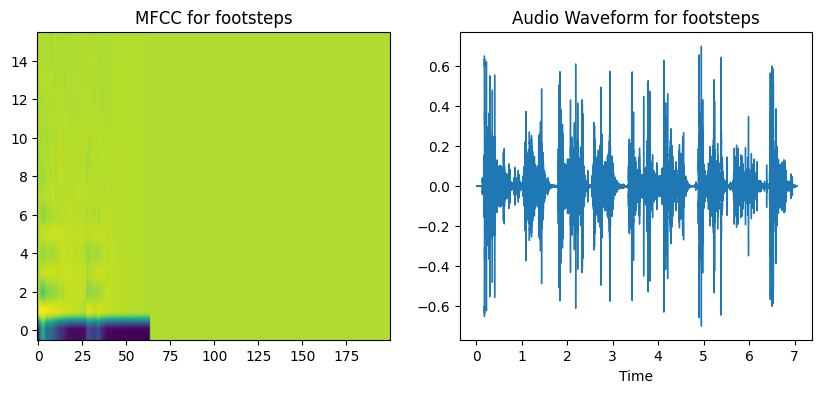

Audio File: footsteps_30.mp3
Label: footsteps, Index: 17


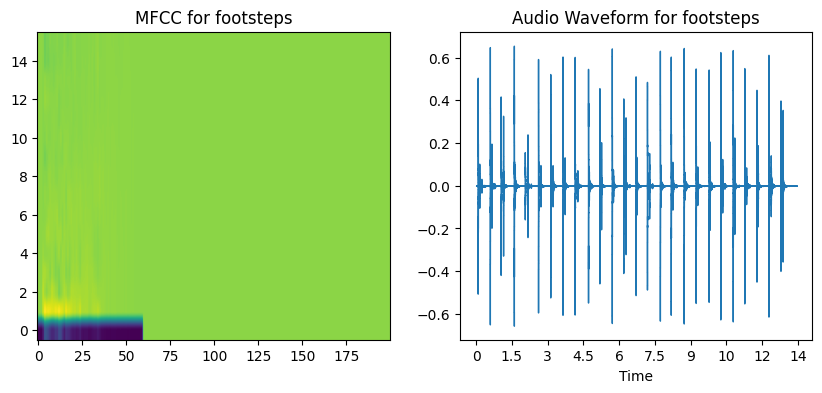

Audio File: footsteps_37.mp3
Label: non-footsteps, Index: 374


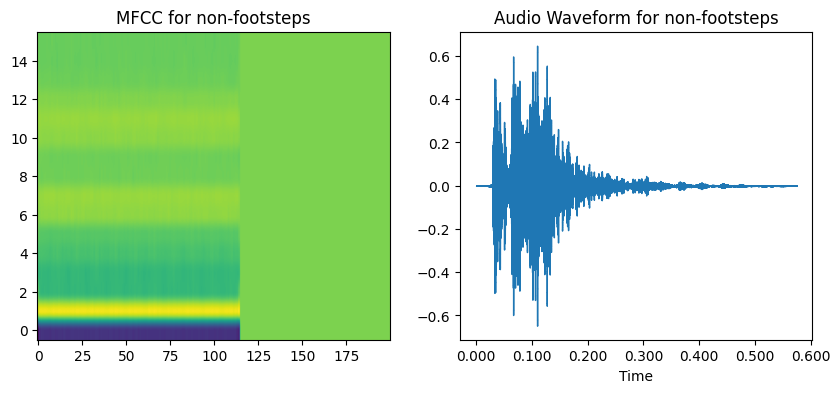

Audio File: non-footsteps_72.mp3
Label: non-footsteps, Index: 225


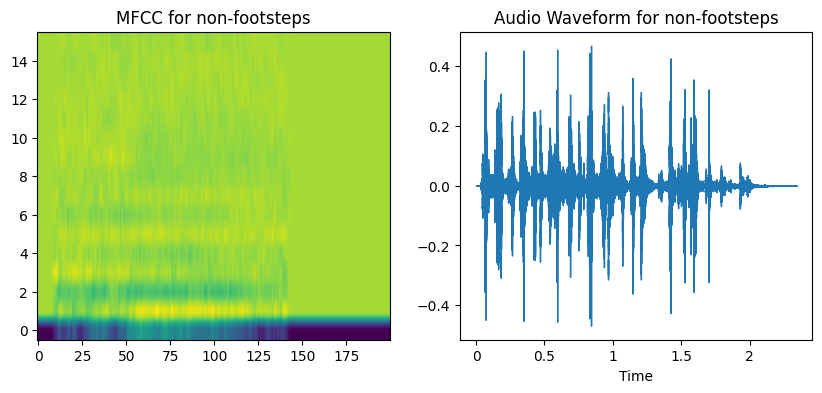

Audio File: non-footsteps_199.mp3


In [ ]:
import matplotlib.pyplot as plt
num_samples_per_label = 2

for label in labels:
    label_indices = [idx for idx, lbl in enumerate(target_labels) if lbl == label]

    if len(label_indices) >= num_samples_per_label:
        sample_indices = np.random.choice(label_indices, num_samples_per_label, replace=False)
        label_folder = os.path.join(audio_folder, label)
        audio_files1 = [f for f in os.listdir(label_folder) if f.endswith('.mp3')]

        for sample_idx, audio_idx in enumerate(sample_indices):
            print(f"Label: {target_labels[audio_idx]}, Index: {audio_idx}")
            plt.figure(figsize=(10, 4))

            plt.subplot(1, 2, 1)
            plt.imshow(data[audio_idx], cmap='viridis', origin='lower', aspect='auto')
            plt.title(f'MFCC for {target_labels[audio_idx]}')

            plt.subplot(1, 2, 2)
            audio_path = os.path.join(label_folder, audio_files1[sample_idx])
            audio, sr = librosa.load(audio_path, sr=None)
            librosa.display.waveshow(audio, sr=sr)
            plt.title(f'Audio Waveform for {target_labels[audio_idx]}')

            plt.show()
            print(f"Audio File: {audio_files1[sample_idx]}")
    else:
        print(f"Not enough samples for label: {label}")


##**MEL SPECTROGRAM OF THE 1 SAMPLE FROM EACH LABEL**

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=200
  warnings.warn(


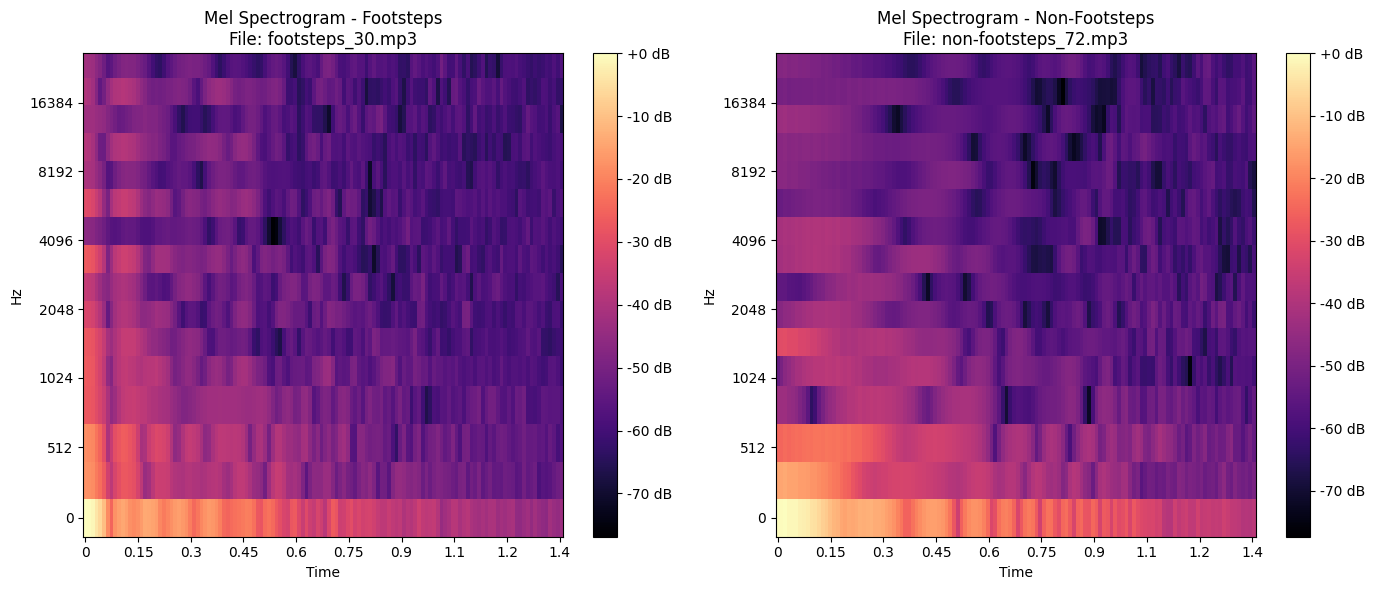

In [ ]:
import librosa.display
import matplotlib.pyplot as plt


footsteps_indices = [idx for idx, label in enumerate(target_labels) if label == 'footsteps']
non_footsteps_indices = [idx for idx, label in enumerate(target_labels) if label == 'non-footsteps']


if footsteps_indices and non_footsteps_indices:
    footsteps_example_idx = footsteps_indices[0]
    non_footsteps_example_idx = non_footsteps_indices[0]

    footsteps_file_name = os.path.basename(audio_files[footsteps_example_idx])
    non_footsteps_file_name = os.path.basename(audio_files[non_footsteps_example_idx])

    footsteps_spectrogram = librosa.feature.melspectrogram(y=data[footsteps_example_idx], sr=sr)
    footsteps_spectrogram_db = librosa.power_to_db(footsteps_spectrogram, ref=np.max)

    non_footsteps_spectrogram = librosa.feature.melspectrogram(y=data[non_footsteps_example_idx], sr=sr)
    non_footsteps_spectrogram_db = librosa.power_to_db(non_footsteps_spectrogram, ref=np.max)

    footsteps_spectrogram_db = footsteps_spectrogram_db.squeeze()
    non_footsteps_spectrogram_db = non_footsteps_spectrogram_db.squeeze()

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    librosa.display.specshow(footsteps_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - Footsteps\nFile: {footsteps_file_name}')

    plt.subplot(1, 2, 2)
    librosa.display.specshow(non_footsteps_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - Non-Footsteps\nFile: {non_footsteps_file_name}')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough examples available in both 'footsteps' and 'non-footsteps' categories.")






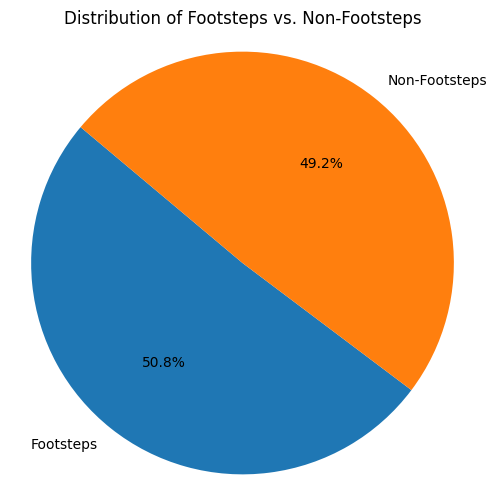

In [ ]:
no_of_footsteps=len(footsteps_indices)
no_of_non_footsteps=len(non_footsteps_indices)

labels = ['Footsteps', 'Non-Footsteps']
sizes = [no_of_footsteps, no_of_non_footsteps]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the size of the figure
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Footsteps vs. Non-Footsteps')

# Display the pie chart
plt.show()

##**The total number of footsteps and non footsteps are almost equal indicating a balanced dataset**

##**NORMALISATION OF THE DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler

data = np.array(data)
target_labels = np.array(target_labels)

scaler = StandardScaler()
data_scaled = np.array([scaler.fit_transform(x) for x in data])



##**LABEL ENCODING**

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)

##**SPLITTING INTO TEST AND TRAIN DATA WITH A RATIO OF 80:20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, encoded_labels, test_size=0.2, random_state=42)

#**MODEL 1:LSTM**
## The LSTM (Long Short-Term Memory) layer used in the model is a type of recurrent neural network (RNN) layer,suited for sequential data analysis, as it can capture temporal dependencies of MFCC's and patterns in sequences.

## The parameters are selected based on the data and after many trials so as to get a better accuracy and ensure non- overfitting.

In [ ]:
lstm_model = models.Sequential([
    layers.Input(shape=X_train[0].shape),
    layers.LSTM(64, return_sequences=True),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
lstm_model.save('lstm_model1.h5')


test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
11/11 [==============================] - 3s 56ms/step - loss: 0.5298 - accuracy: 0.7922 - val_loss: 0.4307 - val_accuracy: 0.8554
Epoch 2/20
11/11 [==============================] - 0s 16ms/step - loss: 0.3907 - accuracy: 0.8313 - val_loss: 0.3937 - val_accuracy: 0.8554
Epoch 3/20
11/11 [==============================] - 0s 18ms/step - loss: 0.3763 - accuracy: 0.8313 - val_loss: 0.3323 - val_accuracy: 0.9036
Epoch 4/20
11/11 [==============================] - 0s 17ms/step - loss: 0.3127 - accuracy: 0.8946 - val_loss: 0.3406 - val_accuracy: 0.8916
Epoch 5/20
11/11 [==============================] - 0s 15ms/step - loss: 0.3030 - accuracy: 0.8675 - val_loss: 0.3502 - val_accuracy: 0.9036
Epoch 6/20
11/11 [==============================] - 0s 17ms/step - loss: 0.2434 - accuracy: 0.9066 - val_loss: 0.2831 - val_accuracy: 0.9036
Epoch 7/20
11/11 [==============================] - 0s 15ms/step - loss: 0.2209 - accuracy: 0.9307 - val_loss: 0.2770 - val_accuracy: 0.9036
Epoch 8/20
11

3/3 [==============================] - 0s 7ms/step


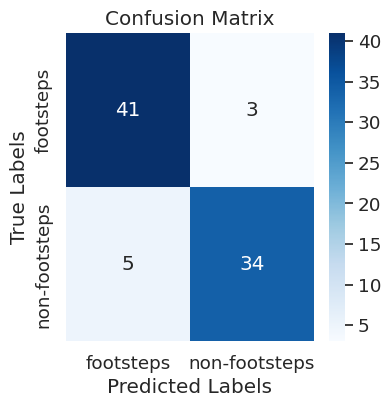

Class: footsteps
Precision: 0.89
Recall: 0.93
F1-score: 0.91
Support: 44

Class: non-footsteps
Precision: 0.92
Recall: 0.87
F1-score: 0.89
Support: 39

Class: macro avg
Precision: 0.91
Recall: 0.90
F1-score: 0.90
Support: 83

Class: weighted avg
Precision: 0.90
Recall: 0.90
F1-score: 0.90
Support: 83

Overall Accuracy: 0.90


In [ ]:
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = lstm_model.predict(X_test)


predicted_labels = np.argmax(y_pred, axis=1)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predicted_labels)


plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report


classification_rep = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_, output_dict=True)

for class_name, metrics in classification_rep.items():
    if class_name != 'accuracy':
        print(f"Class: {class_name}")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-score: {metrics['f1-score']:.2f}")
        print(f"Support: {metrics['support']}")
        print()


print(f"Overall Accuracy: {classification_rep['accuracy']:.2f}")



#**MODEL 2:CNN**

##This CNN model is for extracting patterns from 2D MFCC matrices, where each matrix represents the distribution of MFCC coefficients over time for a specific audio sample.The key distinction between these models lies in their compatibility with different types of data and their strengths in handling specific tasks. CNNs are effective for extracting local patterns and spatial features from structured data like MFCCs, making them suitable for audio classification. On the other hand, LSTMs are well-suited for modeling temporal dependencies in sequences


In [ ]:

X_train_cnn = [np.array(x)[:,:,np.newaxis] for x in X_train]
X_test_cnn = [np.array(x)[:,:,np.newaxis] for x in X_test]



In [ ]:
cnn_model = models.Sequential([
    layers.Input(shape=X_train_cnn[0].shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
window_size = 0.025
fixed_time_frames = 200

X_train_cnn = []
for x in X_train:

    if x.shape[1] < fixed_time_frames:
        x = np.pad(x, ((0, 0), (0, fixed_time_frames - x.shape[1])))
    else:
        x = x[:, :fixed_time_frames]
    X_train_cnn.append(x.T[np.newaxis, :, :, np.newaxis])

X_test_cnn = []
for x in X_test:

    if x.shape[1] < fixed_time_frames:
        x = np.pad(x, ((0, 0), (0, fixed_time_frames - x.shape[1])))
    else:
        x = x[:, :fixed_time_frames]
    X_test_cnn.append(x.T[np.newaxis, :, :, np.newaxis])


X_train_cnn = np.concatenate(X_train_cnn, axis=0)
X_test_cnn = np.concatenate(X_test_cnn, axis=0)


cnn_model = models.Sequential([
    layers.Input(shape=X_train_cnn[0].shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))
cnn_model.save('cnn_model1.h5')

Epoch 1/20
11/11 [==============================] - 2s 90ms/step - loss: 0.5040 - accuracy: 0.7500 - val_loss: 0.4544 - val_accuracy: 0.7590
Epoch 2/20
11/11 [==============================] - 1s 74ms/step - loss: 0.3734 - accuracy: 0.8675 - val_loss: 0.3484 - val_accuracy: 0.8916
Epoch 3/20
11/11 [==============================] - 1s 75ms/step - loss: 0.2956 - accuracy: 0.8705 - val_loss: 0.2853 - val_accuracy: 0.9036
Epoch 4/20
11/11 [==============================] - 1s 98ms/step - loss: 0.2614 - accuracy: 0.9066 - val_loss: 0.2735 - val_accuracy: 0.9157
Epoch 5/20
11/11 [==============================] - 1s 116ms/step - loss: 0.2067 - accuracy: 0.9247 - val_loss: 0.2609 - val_accuracy: 0.9157
Epoch 6/20
11/11 [==============================] - 1s 74ms/step - loss: 0.1665 - accuracy: 0.9398 - val_loss: 0.2256 - val_accuracy: 0.9518
Epoch 7/20
11/11 [==============================] - 1s 71ms/step - loss: 0.1507 - accuracy: 0.9488 - val_loss: 0.2966 - val_accuracy: 0.8434
Epoch 8/20
1

##In both the cases **epoch** were taken as **20** so as to ensure there is no overfiitng.As it can be seen from both the models that the validation loss is decreasing eventually so it confirms the same.

3/3 - 0s - loss: 0.1314 - accuracy: 0.9518 - 62ms/epoch - 21ms/step
Test Loss: 0.13138487935066223
Test Accuracy: 0.9518072009086609
3/3 [==============================] - 0s 15ms/step


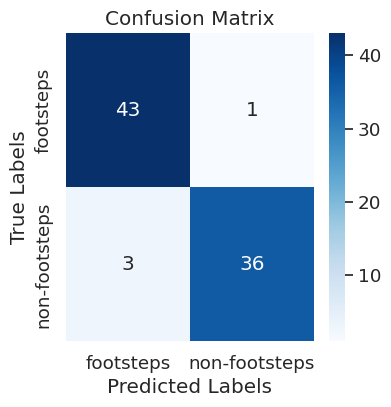

Class: footsteps
Precision: 0.93
Recall: 0.98
F1-score: 0.96
Support: 44

Class: non-footsteps
Precision: 0.97
Recall: 0.92
F1-score: 0.95
Support: 39

Class: macro avg
Precision: 0.95
Recall: 0.95
F1-score: 0.95
Support: 83

Class: weighted avg
Precision: 0.95
Recall: 0.95
F1-score: 0.95
Support: 83

Overall Accuracy: 0.95


In [ ]:
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=2)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

y_pred = cnn_model.predict(X_test_cnn)

predicted_labels = np.argmax(y_pred, axis=1)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_, output_dict=True)

for class_name, metrics in classification_rep.items():
    if class_name != 'accuracy':
        print(f"Class: {class_name}")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-score: {metrics['f1-score']:.2f}")
        print(f"Support: {metrics['support']}")
        print()

overall_accuracy = classification_rep['accuracy']
print(f"Overall Accuracy: {overall_accuracy:.2f}")



#**Model 3: SVM**
##The underlying principle of SVM involves the identification of an optimal hyperplane that maximizes the margin between different acoustic patterns, in this case, footstep and non-footstep sounds. This unique ability to create a clear boundary between classes is pivotal for the precise identification of footsteps.

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


num_samples_train, num_rows, num_cols, num_channels = X_train_cnn.shape
num_samples_test, _, _, _ = X_test_cnn.shape

X_train_reshaped = X_train_cnn.reshape(num_samples_train, -1)
X_test_reshaped = X_test_cnn.reshape(num_samples_test, -1)


svm_classifier = SVC(kernel='linear', C=0.005)


svm_classifier.fit(X_train_reshaped, y_train)


y_pred = svm_classifier.predict(X_test_reshaped)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9156626506024096


In [ ]:
from sklearn.metrics import accuracy_score

# Use the trained SVM classifier to predict labels for the training data
y_train_pred = svm_classifier.predict(X_train_reshaped)

# Calculate the accuracy of the SVM classifier on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9066265060240963


SVM Accuracy: 0.9156626506024096


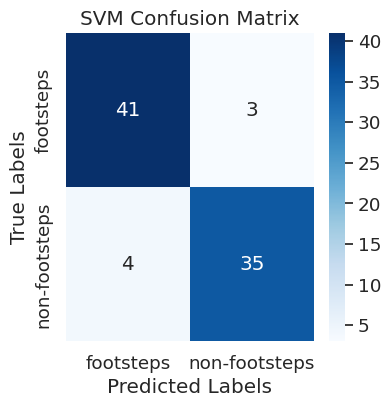

Class: footsteps
Precision: 0.91
Recall: 0.93
F1-score: 0.92
Support: 44

Class: non-footsteps
Precision: 0.92
Recall: 0.90
F1-score: 0.91
Support: 39

Class: macro avg
Precision: 0.92
Recall: 0.91
F1-score: 0.92
Support: 83

Class: weighted avg
Precision: 0.92
Recall: 0.92
F1-score: 0.92
Support: 83

SVM Overall Accuracy: 0.92


In [ ]:
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt


svm_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("SVM Accuracy:", svm_accuracy)


svm_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.show()

svm_classification_rep = sklearn.metrics.classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

for class_name, metrics in svm_classification_rep.items():
    if class_name != 'accuracy':
        print(f"Class: {class_name}")
        print(f"Precision: {metrics['precision']:.2f}")
        print(f"Recall: {metrics['recall']:.2f}")
        print(f"F1-score: {metrics['f1-score']:.2f}")
        print(f"Support: {metrics['support']}")
        print()

svm_overall_accuracy = svm_classification_rep['accuracy']
print(f"SVM Overall Accuracy: {svm_overall_accuracy:.2f}")


#**SUMMARY:**
###In our model evaluation, which included Long Short-Term Memory (LSTM), Convolutional Neural Network (CNN), and Support Vector Machine (SVM) models, we observed distinct performance differences. The CNN model gave an high accuracy rate of 95% . This high accuracy, combined with a good precision score of 0.93 in identifying "Footsteps," positions CNN as an excellent choice for precision-critical applications like medical diagnoses or security systems.

###The LSTM model also demonstrated great recall scores for both "Footsteps" and "Non-Footsteps" classes, indicating its effectiveness in identifying instances of both. However, it exhibited a slight precision deficit, particularly in the "Non-Footsteps" class, requiring further investigation.

###The SVM model showed balanced performance, with reasonable scores for both "Footsteps" and "Non-Footsteps" classes. This balance makes it suitable for applications where maintaining a trade-off between precision and recall is crucial.

